# Optimización de un modelo de red neuronal (fully-connected)

Este notebook recoge los resultados de la búsqueda del mejor modelo de clasificación mediante una red neuronal densa o fully-connected, ya que el uso de redes convolucionales no parece adecuado para un problema de datos tabulares.

Para buscar el mejor modelo posible, se tratará de buscar los mejores hiperparámetros para el número de capas ocultas de la red, su anchura (número de neuronas), posible introducción de términos de regularización, optimizadores, ...

### Preparación de los datos

In [1]:
# Estructuras de datos
import pandas as pd
import numpy as np

# Librerías de optimización de hiperparámetros
import optuna

# Accuracy
from sklearn.metrics import accuracy_score

# Cargar los datos
from data_and_submissions import *

# Métodos para los entrenamientos con CV
from train_cv_methods import *

Vamos a usar la siguiente partición de los datos:

* 60% train $\sim$ 50 datos
* 20% validation $\sim$ 18 datos (se define al aplicar cross-validación en el ajuste)
* 20% test $\sim$ 18 datos

In [2]:
X_train, X_test, y_train, y_test, test_kaggle = load_data()
print("Tamaño del dataset de train:", X_train.shape)
print("Tamaño del dataset de test:", X_test.shape)

Tamaño del dataset de train: (68, 410)
Tamaño del dataset de test: (18, 410)


# Prueba: efectividad preprocesado

In [3]:
import tensorflow as tf
import keras
from keras import layers, models, optimizers, callbacks, backend, preprocessing, regularizers

### Sin aplicar preprocesado

In [4]:
def objective_no_preprocess(trial):
    '''
    Define la función a optimizar por medio de un sampler de tipo TPE.
    Se va a utilizar para estudiar si las redes tienen un mejor funcionamiento si se escalan sus datos
    '''
    modelFC_optuna = models.Sequential()

    # Se utiliza el objeto "trial" para asignar las posibilidades a los hiperparámetros.
    n_layers = trial.suggest_int("n_layers", 2, 5, 1)
    num_hidden = trial.suggest_int("n_units", 50, 250, 50)
    for i in range(n_layers):
        modelFC_optuna.add(layers.Dense(num_hidden, activation="relu"))
    modelFC_optuna.add(layers.Dense(1, activation="sigmoid"))

    optimizers = trial.suggest_categorical("optimizer", ["RMSprop", "SGD", "Adam"])
    modelFC_optuna.compile(loss="categorical_crossentropy", optimizer=optimizers, metrics=["accuracy"])
    
    es = callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5)
    modelFC_optuna.fit(X_train, y_train, callbacks=[es], epochs=100, validation_split=0.25, verbose=0)

    loss, accuracy = modelFC_optuna.evaluate(X_test, y_test)
    return accuracy

In [5]:
# Creamos un objeto "study" y buscamos la optimización de la función objetivo.
sampler = optuna.samplers.TPESampler(seed=0)
study_no_preprocess = optuna.create_study(direction="maximize", sampler=sampler)
study_no_preprocess.optimize(objective_no_preprocess, n_trials=15)

[I 2022-07-03 13:01:44,475] A new study created in memory with name: no-name-81588589-8ab2-4318-8613-5e76a6c6d570


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:01:50,490] Trial 0 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 200, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:01:52,110] Trial 1 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 150, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:01:53,899] Trial 2 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 150, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:01:55,292] Trial 3 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 50, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:01:56,756] Trial 4 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 200, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:01:59,197] Trial 5 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 50, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:01,585] Trial 6 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 200, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:03,246] Trial 7 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 200, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:05,566] Trial 8 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 150, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:07,384] Trial 9 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 100, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:10,681] Trial 10 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 250, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:12,839] Trial 11 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 250, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:15,169] Trial 12 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 100, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:17,460] Trial 13 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 150, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:19,079] Trial 14 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 200, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


In [6]:
study_no_preprocess.best_trial

FrozenTrial(number=0, values=[0.4444444477558136], datetime_start=datetime.datetime(2022, 7, 3, 13, 1, 44, 477414), datetime_complete=datetime.datetime(2022, 7, 3, 13, 1, 50, 490850), params={'n_layers': 4, 'n_units': 200, 'optimizer': 'RMSprop'}, distributions={'n_layers': IntUniformDistribution(high=5, low=2, step=1), 'n_units': IntUniformDistribution(high=250, low=50, step=50), 'optimizer': CategoricalDistribution(choices=('RMSprop', 'SGD', 'Adam'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)

In [7]:
tf.keras.utils.set_random_seed(0) # Reproducibilidad de resultados

# Definir y entrenar el modelo
modelFC_optuna_no_preprocess = models.Sequential()
modelFC_optuna_no_preprocess.add(layers.Dense(200, activation="relu", input_shape=(410,)))
modelFC_optuna_no_preprocess.add(layers.Dense(200, activation="relu"))
modelFC_optuna_no_preprocess.add(layers.Dense(200, activation="relu"))
modelFC_optuna_no_preprocess.add(layers.Dense(200, activation="relu"))
modelFC_optuna_no_preprocess.add(layers.Dense(1, activation="sigmoid"))

modelFC_optuna_no_preprocess.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])
es = callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=5)
modelFC_optuna_no_preprocess.fit(X_train, y_train, epochs=100, validation_split=0.25, callbacks=[es])

# Precisión en partición de test
loss, accuracy = modelFC_optuna_no_preprocess.evaluate(X_test, y_test)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

Epoch 1/100
2/2 [==============================] - 3s 366ms/step - loss: 0.6823 - acc: 0.5686 - val_loss: 0.6734 - val_acc: 0.6471
Epoch 2/100
2/2 [==============================] - 0s 72ms/step - loss: 0.4921 - acc: 0.8431 - val_loss: 0.9328 - val_acc: 0.5882
Epoch 3/100
2/2 [==============================] - 0s 66ms/step - loss: 0.4662 - acc: 0.7255 - val_loss: 0.6614 - val_acc: 0.7059
Epoch 4/100
2/2 [==============================] - 0s 42ms/step - loss: 0.1876 - acc: 1.0000 - val_loss: 0.6741 - val_acc: 0.6471
Epoch 5/100
2/2 [==============================] - 0s 50ms/step - loss: 0.0767 - acc: 1.0000 - val_loss: 0.8513 - val_acc: 0.7647
Epoch 6/100
2/2 [==============================] - 0s 43ms/step - loss: 0.0404 - acc: 1.0000 - val_loss: 0.7580 - val_acc: 0.7059
Epoch 7/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0168 - acc: 1.0000 - val_loss: 0.7779 - val_acc: 0.5882
Epoch 8/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0092 - acc: 1.0

### Escalando los datos

In [8]:
from sklearn.preprocessing import StandardScaler

preprocess = StandardScaler()

X_train_processed = preprocess.fit_transform(X_train)
X_test_processed = preprocess.fit_transform(X_test)

In [9]:
def objective_preprocess(trial):
    '''
    Define la función a optimizar por medio de un sampler de tipo TPE.
    Se va a utilizar para estudiar si las redes tienen un mejor funcionamiento si se escalan sus datos
    '''
    modelFC_optuna = models.Sequential()

    # Se utiliza el objeto "trial" para asignar las posibilidades a los hiperparámetros.
    n_layers = trial.suggest_int("n_layers", 2, 5, 1)
    num_hidden = trial.suggest_int("n_units", 50, 250, 50)
    for i in range(n_layers):
        modelFC_optuna.add(layers.Dense(num_hidden, activation="relu"))
    modelFC_optuna.add(layers.Dense(1, activation="sigmoid"))

    optimizers = trial.suggest_categorical("optimizer", ["RMSprop", "SGD", "Adam"])
    modelFC_optuna.compile(loss="categorical_crossentropy", optimizer=optimizers, metrics=["accuracy"])
    
    es = callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5)
    modelFC_optuna.fit(X_train_processed, y_train, callbacks=[es], epochs=100, validation_split=0.25, verbose=0)

    loss, accuracy = modelFC_optuna.evaluate(X_test_processed, y_test)
    return accuracy

In [10]:
# Creamos un objeto "study" y buscamos la optimización de la función objetivo.
sampler = optuna.samplers.TPESampler(seed=0)
study_preprocess = optuna.create_study(direction="maximize", sampler=sampler)
study_preprocess.optimize(objective_preprocess, n_trials=15)

[I 2022-07-03 13:02:50,414] A new study created in memory with name: no-name-ff3ad585-c237-465a-8fb9-9935c75b19d1


1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:51,978] Trial 0 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 200, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:53,211] Trial 1 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 150, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:55,057] Trial 2 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 150, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:56,179] Trial 3 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 50, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:57,315] Trial 4 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 200, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:58,889] Trial 5 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 50, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:02:59,978] Trial 6 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 200, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:03:01,203] Trial 7 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 200, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:03:02,811] Trial 8 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 150, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:03:04,726] Trial 9 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 100, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:03:06,515] Trial 10 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 250, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:03:08,401] Trial 11 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 250, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:03:09,645] Trial 12 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 100, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:03:11,405] Trial 13 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 150, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-03 13:03:12,714] Trial 14 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 200, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


In [11]:
study_preprocess.best_trial

FrozenTrial(number=0, values=[0.4444444477558136], datetime_start=datetime.datetime(2022, 7, 3, 13, 2, 50, 414191), datetime_complete=datetime.datetime(2022, 7, 3, 13, 2, 51, 977516), params={'n_layers': 4, 'n_units': 200, 'optimizer': 'RMSprop'}, distributions={'n_layers': IntUniformDistribution(high=5, low=2, step=1), 'n_units': IntUniformDistribution(high=250, low=50, step=50), 'optimizer': CategoricalDistribution(choices=('RMSprop', 'SGD', 'Adam'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)

In [12]:
tf.keras.utils.set_random_seed(0) # Reproducibilidad de resultados

# Definir y entrenar el modelo
modelFC_optuna_no_preprocess = models.Sequential()
modelFC_optuna_no_preprocess.add(layers.Dense(200, activation="relu", input_shape=(410,)))
modelFC_optuna_no_preprocess.add(layers.Dense(200, activation="relu"))
modelFC_optuna_no_preprocess.add(layers.Dense(200, activation="relu"))
modelFC_optuna_no_preprocess.add(layers.Dense(200, activation="relu"))
modelFC_optuna_no_preprocess.add(layers.Dense(1, activation="sigmoid"))

modelFC_optuna_no_preprocess.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])
es = callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=5)
modelFC_optuna_no_preprocess.fit(X_train_processed, y_train, epochs=100, validation_split=0.25, callbacks=[es])

# Precisión en partición de test
loss, accuracy = modelFC_optuna_no_preprocess.evaluate(X_test_processed, y_test)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

Epoch 1/100
2/2 [==============================] - 1s 261ms/step - loss: 0.6690 - acc: 0.5686 - val_loss: 0.8292 - val_acc: 0.5882
Epoch 2/100
2/2 [==============================] - 0s 66ms/step - loss: 0.3761 - acc: 0.8627 - val_loss: 0.7716 - val_acc: 0.7059
Epoch 3/100
2/2 [==============================] - 0s 49ms/step - loss: 0.1697 - acc: 0.9412 - val_loss: 0.6257 - val_acc: 0.8235
Epoch 4/100
2/2 [==============================] - 0s 46ms/step - loss: 0.0484 - acc: 1.0000 - val_loss: 0.6701 - val_acc: 0.7647
Epoch 5/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0224 - acc: 1.0000 - val_loss: 0.6927 - val_acc: 0.7647
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0123 - acc: 1.0000 - val_loss: 0.7118 - val_acc: 0.7647
Epoch 7/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.7372 - val_acc: 0.8235
Epoch 8/100
1/1 [==============================] - 0s 37ms/step - loss: 0.6386 - acc: 0.6

Lo anterior muestra que el uso de los datos escalados puede hacer que, aún habiéndose escogido la misma infraestructura de red en el proceso de optimización, la misma red entrenada sobre los datos escalados pierde en accuracy más de un 20% frente a la entrenada con los datos sin aplicar ningún tipo de preprocesado.

### Modelo

Para redes neuronales, compararemos los resultados obtenidos construyendo redes a partir de librerías distintas.

**Comenzamos con ``MLPClassifier`` de ``sklearn`` y búsqueda de hiperparámetros con ``GridSearchCV``:**

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

El método debe recibir arquitecturas de red pre-definidas, por lo que probaremos topologías variadas en cuanto a profundidad, ancho y número de capas.

_NOTA: el parámetro ``learning_rate`` sólo se aplica cuando el solver que se esté utilizando sea el "sgd", el cual toma el valor constamte por defecto. Podría resultar de especial utilidad cuando toma el valor "adaptive", en ese caso mantiene el valor del learning_rate constante mientras la curva de pérdida siga decreciendo, en el momento en que haya dos épocas consecutivas en las que no decrece un mínimo el valor de loss, el learning_rate se divide entre 5._

In [14]:
from sklearn.neural_network import MLPClassifier

model_MLPC = MLPClassifier(max_iter=1000, random_state=0)
param_grid_MLPC = {
    "hidden_layer_sizes": [(100, 200, 100, 1), (100, 100, 100, 100, 1), (200, 200, 100, 50, 1), (100, 250, 250, 100, 1)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["sgd", "adam"], # solver "lbfgs" no permite hacer los plots más abajo
    "learning_rate": ["constant", "invscaling", "adaptive"] # únicamente válido junto con el solver "sgd"
}

In [7]:
cv_results_MLPC = train_GridSearchCV(model_MLPC, param_grid_MLPC, X_train, X_test, y_train, y_test)

C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\en

C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\en

C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\en

C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\en

C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
top_acc = top_acc_GridSearchCV(cv_results_MLPC["mean_test_score"])
models_same_acc_GridSearchCV(cv_results_MLPC, top_acc)

[{'activation': 'relu',
  'hidden_layer_sizes': (100, 250, 250, 100, 1),
  'learning_rate': 'constant',
  'solver': 'adam'},
 {'activation': 'relu',
  'hidden_layer_sizes': (100, 250, 250, 100, 1),
  'learning_rate': 'invscaling',
  'solver': 'adam'},
 {'activation': 'relu',
  'hidden_layer_sizes': (100, 250, 250, 100, 1),
  'learning_rate': 'adaptive',
  'solver': 'adam'}]

In [25]:
model_MLPC_opt = MLPClassifier(activation="relu", hidden_layer_sizes=(100, 250, 250, 100, 1), solver="adam",
                               max_iter=1000, random_state=0)
model_MLPC_opt.fit(X_train, y_train)

# Predicción en partición de test
y_pred_MLPC = model_MLPC_opt.predict(X_test)

# Precisión en partición de test
accuracy = accuracy_score(y_test, y_pred_MLPC)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

Accuracy: 83.33%


C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


_COMPROBACIÓN: la función de activación elegida sólo afecta a las capas ocultas y no a la capa de clasificación en la salida._

In [10]:
model_MLPC_opt.out_activation_

'logistic'

Las anteriores celdas de código muestran un "warning" indicando que el método de computación alcanza el número máximo de iteraciones (épocas de entrenamiento) sin haber llegado a converger.

El criterio para considerar que ha habido convergencia está definido en la documentación como: la reducción del valor de la función de loss es inferior a 1e-4 por un número de etapas determinado. 

La anterior condición por tanto no se está cumpliendo en nuestro entrenamiento, así que vamos a pintar la evolución de la función de pérdida para determinar si estamos cortando el entrenamiento demasiado pronto.

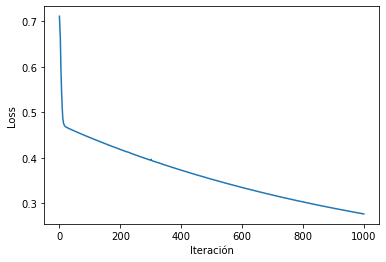

In [23]:
import matplotlib.pylab as plt

plt.plot(model_MLPC_opt.loss_curve_)
plt.xlabel("Iteración")
plt.ylabel("Loss")
plt.show()

La anterior curva de loss parece tener una tendencia aún claramente descendiente cuando es cortada en la época número 1000. Se va a repetir el entrenamiento incrementando este valor:

In [12]:
model_MLPC2 = MLPClassifier(max_iter=1500, random_state=0)
cv_results_MLPC2 = train_GridSearchCV(model_MLPC2, param_grid_MLPC, X_train, X_test, y_train, y_test)

C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\en

C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\en

In [13]:
top_acc = top_acc_GridSearchCV(cv_results_MLPC2["mean_test_score"])
models_same_acc_GridSearchCV(cv_results_MLPC2, top_acc)

[{'activation': 'identity',
  'hidden_layer_sizes': (200, 200, 100, 50, 1),
  'learning_rate': 'constant',
  'solver': 'adam'},
 {'activation': 'identity',
  'hidden_layer_sizes': (200, 200, 100, 50, 1),
  'learning_rate': 'invscaling',
  'solver': 'adam'},
 {'activation': 'identity',
  'hidden_layer_sizes': (200, 200, 100, 50, 1),
  'learning_rate': 'adaptive',
  'solver': 'adam'}]

In [26]:
model_MLPC_opt2 = MLPClassifier(activation="tanh", hidden_layer_sizes=(200, 200, 100, 50, 1), solver="adam",
                                max_iter=1500, random_state=0)
model_MLPC_opt2.fit(X_train, y_train)

# Predicción en partición de test
y_pred_MLPC2 = model_MLPC_opt2.predict(X_test)

# Precisión en partición de test
accuracy = accuracy_score(y_test, y_pred_MLPC2)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

Accuracy: 77.78%


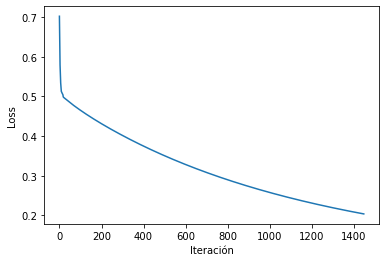

In [27]:
import matplotlib.pylab as plt

plt.plot(model_MLPC_opt2.loss_curve_)
plt.xlabel("Iteración")
plt.ylabel("Loss")
plt.show()

Al aumentar el número de épocas, los resultados varían y el modelo que se retorna ahora como óptimo necesita solamente 25 épocas para converger.

Sin embargo, sorprende que este último modelo que ha resultado generar predicciones con un mejor accuracy y que no sobrepasan el primer tope de 1000 iteraciones no haya sido el elegido en la primera búsqueda. Vamos a comparar las precisiones que han alcanzado cada uno de los modelos en el entrenamiento en cada una de las repeticiones de cross-validación:

In [37]:
result1 = {'activation': 'relu',
  'hidden_layer_sizes': (100, 250, 250, 100, 1),
  'learning_rate': 'constant',
  'solver': 'adam'}

result2 = {'activation': 'identity',
  'hidden_layer_sizes': (200, 200, 100, 50, 1),
  'learning_rate': 'constant',
  'solver': 'adam'}

In [38]:
for i, item in enumerate(cv_results_MLPC["params"]):
    if item == result1:
        print(i)
        break

for i, item in enumerate(cv_results_MLPC["params"]):
    if item == result2:
        print(i)
        break

91
13


In [43]:
print("MODELO OPT (1000 iter) - Accuracy en primer entrenamiento:", cv_results_MLPC["mean_test_score"][91])
print("MODELO OPT (1500 iter) - Accuracy en primer entrenamiento:", cv_results_MLPC["mean_test_score"][13])

MODELO OPT (1000 iter) - Accuracy en primer entrenamiento: 0.6764705882352942
MODELO OPT (1500 iter) - Accuracy en primer entrenamiento: 0.676470588235294


In [42]:
for i, item in enumerate(cv_results_MLPC2["params"]):
    if item == result1:
        print(i)
        break

for i, item in enumerate(cv_results_MLPC2["params"]):
    if item == result2:
        print(i)
        break

91
13


In [44]:
print("MODELO OPT (1000 iter) - Accuracy en segundo entrenamiento:", cv_results_MLPC2["mean_test_score"][91])
print("MODELO OPT (1500 iter) - Accuracy en segundo entrenamiento:", cv_results_MLPC2["mean_test_score"][13])

MODELO OPT (1000 iter) - Accuracy en segundo entrenamiento: 0.6617647058823529
MODELO OPT (1500 iter) - Accuracy en segundo entrenamiento: 0.676470588235294


Se observa que en la primera prueba de ``GridSearchCV`` ambos modelos tienen una accuracy prácticamente idéntica durante el entrenamiento, aunque al no terminar de converger el primero (visto con las 1000 iteraciones), finalmente su accuracy tiene un decimal más y por ser en definitiva mayor, es el único modelo escogido. Sin embargo, al aumentar el margen de iteraciones, mientras que el segundo modelo (1500 iteraciones) no cambia su accuracy, el primero sigue entrenando y el valor final de precisión del entrenamiento en este segundo caso decrece.

Por tanto, el óptimo hasta este momento y de acuerdo a las pruebas anteriores es el modelo obtenido en la segunda prueba.

La librería ``sklearn`` permite implementar un tercer optimizador, lbfgs, que no se ha incluído en las pruebas anteriores ya que no permite dibujar la curva de loss para hacer las anteriores comprobaciones. Por tanto, vamos ahora a probar y comparar los resultados manualmente incluyendo este optimizador.

El solver ``sgd`` no se ha elegido en ninguna de las anteriores pruebas. Como en esta ocasión queremos comprobar si el solver ``lbfgs`` incrementa el accuracy frente a los resultados anteriores, prescindiremos del solver ``sgd`` y la optimización del tipo de learning rate.

In [49]:
# Definir y entrenar el modelo
model_MLPC3 = MLPClassifier(max_iter=1000, random_state=0)
param_grid_MLPC3 = {
    "hidden_layer_sizes": [(100, 200, 100, 1), (100, 100, 100, 100, 1), (200, 200, 100, 50, 1), (100, 250, 250, 100, 1)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["adam", "lbfgs"]
}
cv_results_MLPC3 = train_GridSearchCV(model_MLPC3, param_grid_MLPC3, X_train, X_test, y_train, y_test)

C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\en

In [50]:
top_acc = top_acc_GridSearchCV(cv_results_MLPC3["mean_test_score"])
models_same_acc_GridSearchCV(cv_results_MLPC3, top_acc)

[{'activation': 'relu',
  'hidden_layer_sizes': (100, 250, 250, 100, 1),
  'solver': 'adam'}]

Si volvemos a utilizar el máximo de 1000 iteraciones, el óptimo es el mismo obtenido en el primer caso. Vamos a repetir el intento ahora con 1500 épocas de máximo.

In [51]:
# Definir y entrenar el modelo
model_MLPC4 = MLPClassifier(max_iter=1500, random_state=0)
cv_results_MLPC4 = train_GridSearchCV(model_MLPC4, param_grid_MLPC3, X_train, X_test, y_train, y_test)

C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\envs\TFM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saral\miniconda3\en

In [52]:
top_acc = top_acc_GridSearchCV(cv_results_MLPC4["mean_test_score"])
models_same_acc_GridSearchCV(cv_results_MLPC4, top_acc)

[{'activation': 'identity',
  'hidden_layer_sizes': (200, 200, 100, 50, 1),
  'solver': 'adam'}]

Nuevamente, se obtiene el mismo resultado que en el caso anterior.

**Usando la librería "keras"**

Ahora utilizaremos la librería de ``keras``, por su mayor flexibilidad para intentar mejorar los resultados de la red neuronal.

Comenzaremos repitiendo la búsqueda de hiperparámetros, ya que la propia librería de ``keras`` dispone de integración con otras que nos permitirán hacer una búsqueda algo más exhaustiva por ejemplo en cuanto al número de capas y neuronas en estas. Concretamente, vamos a utilizar ``optuna``.

Documentación:
* https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html
* https://optuna.org/

Para reducir el coste computacional tomaremos de base resultados como la función de activación óptima: "relu", que hemos podido obtener con ``GridSearchCV``. Como por el contrario usando ``sklearn`` no hemos podido utilizar el optimizador RMSProp, vamos a probarlo también con ``optuna`` + ``keras`` para ver si mejora nuestros resultados.

Búsqueda mediante la librería ``optuna`` probando 2 métodos de búsqueda de hiperparámetros:

* **GridSampler:** equivalente a la anterior búsqueda de grid de sklearn. Lo usaremos para que los resultados sean comparables.
* **TPE:** algoritmo para hacer una "búsqueda inteligente" de hiperparámetros. Debería ahorrar intentos de combinaciones haciendo una selección inteligente de las pruebas. En nuestro caso le permitiremos probar un 10% del número de combinaciones posibles. 

In [13]:
def objectiveNN_Grid(trial):
    '''
    Define la función a optimizar por medio de un sampler de tipo GridSampler.
    En este caso se trata de maximizar el accuracy para una red neuronal con activación sigmoide
    '''
    modelFC_optuna = models.Sequential()

    # Se utiliza el objeto "trial" para asignar las posibilidades a los hiperparámetros.
    n_layers = trial.suggest_int("n_layers", 1, 5)
    num_hidden = trial.suggest_int("n_units", 50, 250)
    dropout = trial.suggest_float("dropout", 0, 0.5)
    regularization = trial.suggest_categorical("kernel_regularizer", [0, 0.0001, 0.001, 0.01, 0.1, 1])
    for i in range(n_layers):
        modelFC_optuna.add(layers.Dense(num_hidden, activation="relu", kernel_regularizer=regularizers.L2(regularization)))
        modelFC_optuna.add(layers.Dropout(rate=dropout))
    modelFC_optuna.add(layers.Dense(1, activation="sigmoid"))

    optimizers = trial.suggest_categorical("optimizer", ["RMSprop", "SGD", "Adam"])
    modelFC_optuna.compile(loss="categorical_crossentropy", optimizer=optimizers, metrics=["accuracy"])
    
    es = callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5)
    modelFC_optuna.fit(X_train, y_train, callbacks=[es], epochs=100, validation_split=0.25, verbose=0)

    loss, accuracy = modelFC_optuna.evaluate(X_test, y_test)
    return accuracy

In [14]:
# Prueba con GridSampler
optuna.logging.set_verbosity(optuna.logging.WARNING)

search_space = {"n_layers": range(2, 6), 
                "n_units": range(50, 300, 50),
                "dropout": np.arange(0, 0.6, 0.1),
                "kernel_regularizer": [0, 0.0001, 0.001, 0.01, 0.1, 1],
                "optimizer": ["RMSprop", "SGD", "Adam"]
               }
sampler = optuna.samplers.GridSampler(search_space)
study_Grid = optuna.create_study(direction="maximize", sampler=sampler)
study_Grid.optimize(objectiveNN_Grid)

1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


1/1 [==============================] - 0s 16ms/step - loss: 918.4977 - accuracy: 0.4444


1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.4444


1/1 [==============================] - 0s 40ms/step - loss: 44.6657 - accuracy: 0.4444


1/1 [==============================] - 0s 31ms/step - loss: 1.3074 - accuracy: 0.4444


1/1 [==============================] - 0s 31ms/step - loss: 413.3782 - accuracy: 0.4444


1/1 [==============================] - 0s 74ms/step - loss: 61.7479 - accuracy: 0.4444


1/1 [==============================] - 0s 31ms/step - loss: 1.0963 - accuracy: 0.4444


1/1 [==============================] - 0s 16ms/step - loss: 0.0811 - accuracy: 0.4444


1/1 [==============================] - 0s 19ms/step - loss: 0.1397 - accuracy: 0.4444


1/1 [==============================] - 0s 31ms/step - loss: 43.8719 - accuracy: 0.4444


1/1 [==============================] - 0s 16ms/step - loss: 7.9589 - accuracy: 0.4444


1/1 [==============================] - 0s 16ms/step - loss: 0.0535 - accuracy: 0.4444


In [15]:
top_acc = top_acc_OptunaSearchCV(study_Grid.get_trials())
models_same_acc_OptunaSearchCV(study_Grid.get_trials(), top_acc)

[{'n_layers': 2,
  'n_units': 50,
  'dropout': 0.1,
  'kernel_regularizer': 1,
  'optimizer': 'Adam'}]

In [16]:
tf.keras.utils.set_random_seed(0) # Reproducibilidad de resultados

# Definir y entrenar el modelo
modelFC_optuna_Grid = models.Sequential()
modelFC_optuna_Grid.add(layers.Dense(50, activation="relu", kernel_regularizer=regularizers.L2(1), input_shape=(410,)))
modelFC_optuna_Grid.add(layers.Dropout(0.1))
modelFC_optuna_Grid.add(layers.Dense(50, activation="relu", kernel_regularizer=regularizers.L2(1)))
modelFC_optuna_Grid.add(layers.Dropout(0.1))
modelFC_optuna_Grid.add(layers.Dense(1, activation="sigmoid"))

modelFC_optuna_Grid.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["acc"])
es = callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=5)
modelFC_optuna_Grid.fit(X_train, y_train, epochs=100, validation_split=0.25, callbacks=[es])

# Precisión en partición de test
loss, accuracy = modelFC_optuna_Grid.evaluate(X_test, y_test)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

Epoch 1/100
2/2 [==============================] - 1s 144ms/step - loss: 139.4926 - acc: 0.4706 - val_loss: 134.7087 - val_acc: 0.5882
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 133.7013 - acc: 0.5490 - val_loss: 129.0795 - val_acc: 0.5882
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 128.1192 - acc: 0.4902 - val_loss: 123.6406 - val_acc: 0.6471
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 122.7152 - acc: 0.5098 - val_loss: 118.3928 - val_acc: 0.6471
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 117.4984 - acc: 0.5098 - val_loss: 113.3357 - val_acc: 0.6471
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 112.4597 - acc: 0.5294 - val_loss: 108.4679 - val_acc: 0.7059
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 107.6321 - acc: 0.4902 - val_loss: 103.7876 - val_acc: 0.6471
Epoch 8/100
2/2 [==============================] - 0s 32ms/st

In [4]:
def objectiveNN_TPE(trial):
    '''
    Define la función a optimizar por medio de un sampler de tipo TPE.
    En este caso se trata de maximizar el accuracy para una red neuronal con activación sigmoide
    '''
    modelFC_optuna = models.Sequential()

    # Se utiliza el objeto "trial" para asignar las posibilidades a los hiperparámetros.
    n_layers = trial.suggest_int("n_layers", 2, 5, 1)
    num_hidden = trial.suggest_int("n_units", 50, 250, 50)
    dropout = trial.suggest_float("dropout", 0, 0.5, step=0.1)
    regularization = trial.suggest_categorical("kernel_regularizer", [0, 1])
    for i in range(n_layers):
        modelFC_optuna.add(layers.Dense(num_hidden, activation="relu", kernel_regularizer=regularizers.L2(regularization)))
        modelFC_optuna.add(layers.Dropout(rate=dropout))
    modelFC_optuna.add(layers.Dense(1, activation="sigmoid"))

    optimizers = trial.suggest_categorical("optimizer", ["RMSprop", "SGD", "Adam"])
    modelFC_optuna.compile(loss="categorical_crossentropy", optimizer=optimizers, metrics=["accuracy"])
    
    es = callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5)
    modelFC_optuna.fit(X_train, y_train, callbacks=[es], epochs=100, validation_split=0.25, verbose=0)

    loss, accuracy = modelFC_optuna.evaluate(X_test, y_test)
    return accuracy

In [11]:
# Creamos un objeto "study" y buscamos la optimización de la función objetivo.
sampler = optuna.samplers.TPESampler(seed=0)
study_TPE = optuna.create_study(direction="maximize", sampler=sampler)
study_TPE.optimize(objectiveNN_TPE, n_trials=50)
# n_trials = (4 x 5 x 6 x 6 x 3) * 0.1 = 216

[I 2022-07-04 12:17:03,525] A new study created in memory with name: no-name-262720fd-e329-4af5-ba03-a4375bab514a


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:04,691] Trial 0 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 200, 'dropout': 0.30000000000000004, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 371.5739 - accuracy: 0.4444


[I 2022-07-04 12:17:06,425] Trial 1 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 100, 'dropout': 0.4, 'kernel_regularizer': 1, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 244.1016 - accuracy: 0.4444


[I 2022-07-04 12:17:07,708] Trial 2 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 250, 'dropout': 0.4, 'kernel_regularizer': 1, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:08,763] Trial 3 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 200, 'dropout': 0.0, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:09,629] Trial 4 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 150, 'dropout': 0.0, 'kernel_regularizer': 0, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 319.1033 - accuracy: 0.4444


[I 2022-07-04 12:17:10,740] Trial 5 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 150, 'dropout': 0.4, 'kernel_regularizer': 1, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 221.2820 - accuracy: 0.4444


[I 2022-07-04 12:17:11,641] Trial 6 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 100, 'dropout': 0.30000000000000004, 'kernel_regularizer': 1, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:12,672] Trial 7 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 100, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 160.8905 - accuracy: 0.4444


[I 2022-07-04 12:17:13,483] Trial 8 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 100, 'dropout': 0.4, 'kernel_regularizer': 1, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 656.5302 - accuracy: 0.4444


[I 2022-07-04 12:17:14,564] Trial 9 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 200, 'dropout': 0.4, 'kernel_regularizer': 1, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:15,642] Trial 10 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 250, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:16,950] Trial 11 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 50, 'dropout': 0.5, 'kernel_regularizer': 0, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 772.2708 - accuracy: 0.4444


[I 2022-07-04 12:17:18,463] Trial 12 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 200, 'dropout': 0.30000000000000004, 'kernel_regularizer': 1, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:19,480] Trial 13 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 50, 'dropout': 0.5, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 511.3837 - accuracy: 0.4444


[I 2022-07-04 12:17:20,825] Trial 14 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 150, 'dropout': 0.1, 'kernel_regularizer': 1, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:21,839] Trial 15 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 100, 'dropout': 0.30000000000000004, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 627.1524 - accuracy: 0.4444


[I 2022-07-04 12:17:23,250] Trial 16 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 200, 'dropout': 0.2, 'kernel_regularizer': 1, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:24,341] Trial 17 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 150, 'dropout': 0.1, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:25,747] Trial 18 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 50, 'dropout': 0.30000000000000004, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 627.6735 - accuracy: 0.4444


[I 2022-07-04 12:17:27,222] Trial 19 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 200, 'dropout': 0.1, 'kernel_regularizer': 1, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:28,221] Trial 20 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 150, 'dropout': 0.1, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:29,565] Trial 21 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 50, 'dropout': 0.30000000000000004, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:30,641] Trial 22 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 250, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:31,614] Trial 23 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 200, 'dropout': 0.1, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:32,572] Trial 24 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 50, 'dropout': 0.30000000000000004, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:33,875] Trial 25 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 250, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:35,133] Trial 26 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 250, 'dropout': 0.0, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:36,430] Trial 27 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 200, 'dropout': 0.30000000000000004, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:38,279] Trial 28 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 250, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:39,349] Trial 29 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 250, 'dropout': 0.0, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:40,704] Trial 30 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 200, 'dropout': 0.5, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:41,989] Trial 31 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 250, 'dropout': 0.30000000000000004, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:43,355] Trial 32 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 250, 'dropout': 0.4, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:44,466] Trial 33 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 250, 'dropout': 0.5, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:45,618] Trial 34 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 200, 'dropout': 0.5, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 511.7257 - accuracy: 0.4444


[I 2022-07-04 12:17:47,108] Trial 35 finished with value: 0.4444444477558136 and parameters: {'n_layers': 5, 'n_units': 150, 'dropout': 0.1, 'kernel_regularizer': 1, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:48,197] Trial 36 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 150, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:49,298] Trial 37 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 100, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:50,444] Trial 38 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 200, 'dropout': 0.1, 'kernel_regularizer': 0, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:51,556] Trial 39 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 200, 'dropout': 0.4, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:52,808] Trial 40 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 150, 'dropout': 0.30000000000000004, 'kernel_regularizer': 0, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:53,911] Trial 41 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 250, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:54,843] Trial 42 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 250, 'dropout': 0.0, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:55,851] Trial 43 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 250, 'dropout': 0.0, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:56,907] Trial 44 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 200, 'dropout': 0.30000000000000004, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:58,061] Trial 45 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 250, 'dropout': 0.4, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:17:59,311] Trial 46 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 250, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:18:00,709] Trial 47 finished with value: 0.4444444477558136 and parameters: {'n_layers': 4, 'n_units': 250, 'dropout': 0.2, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[I 2022-07-04 12:18:02,247] Trial 48 finished with value: 0.4444444477558136 and parameters: {'n_layers': 3, 'n_units': 200, 'dropout': 0.0, 'kernel_regularizer': 0, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4444444477558136.


1/1 [==============================] - 0s 16ms/step - loss: 305.7816 - accuracy: 0.4444


[I 2022-07-04 12:18:03,465] Trial 49 finished with value: 0.4444444477558136 and parameters: {'n_layers': 2, 'n_units': 250, 'dropout': 0.0, 'kernel_regularizer': 1, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4444444477558136.


In [12]:
top_acc = top_acc_OptunaSearchCV(study_TPE.get_trials())
models_same_acc_OptunaSearchCV(study_TPE.get_trials(), top_acc)

[{'n_layers': 4,
  'n_units': 200,
  'dropout': 0.30000000000000004,
  'kernel_regularizer': 0,
  'optimizer': 'Adam'},
 {'n_layers': 5,
  'n_units': 100,
  'dropout': 0.4,
  'kernel_regularizer': 1,
  'optimizer': 'RMSprop'},
 {'n_layers': 2,
  'n_units': 250,
  'dropout': 0.4,
  'kernel_regularizer': 1,
  'optimizer': 'RMSprop'},
 {'n_layers': 2,
  'n_units': 200,
  'dropout': 0.0,
  'kernel_regularizer': 0,
  'optimizer': 'Adam'},
 {'n_layers': 3,
  'n_units': 150,
  'dropout': 0.0,
  'kernel_regularizer': 0,
  'optimizer': 'SGD'},
 {'n_layers': 3,
  'n_units': 150,
  'dropout': 0.4,
  'kernel_regularizer': 1,
  'optimizer': 'RMSprop'},
 {'n_layers': 3,
  'n_units': 100,
  'dropout': 0.30000000000000004,
  'kernel_regularizer': 1,
  'optimizer': 'SGD'},
 {'n_layers': 4,
  'n_units': 100,
  'dropout': 0.2,
  'kernel_regularizer': 0,
  'optimizer': 'SGD'},
 {'n_layers': 2,
  'n_units': 100,
  'dropout': 0.4,
  'kernel_regularizer': 1,
  'optimizer': 'SGD'},
 {'n_layers': 5,
  'n_units

In [22]:
tf.keras.utils.set_random_seed(0) # Reproducibilidad de resultados

# Definir y entrenar el modelo
modelFC_optuna_TPE = models.Sequential()
modelFC_optuna_TPE.add(layers.Dense(50, activation="relu", kernel_regularizer=regularizers.L2(0.0001), input_shape=(410,)))
modelFC_optuna_TPE.add(layers.Dropout(0.3))
modelFC_optuna_TPE.add(layers.Dense(50, activation="relu", kernel_regularizer=regularizers.L2(0.0001)))
modelFC_optuna_TPE.add(layers.Dropout(0.3))
modelFC_optuna_TPE.add(layers.Dense(50, activation="relu", kernel_regularizer=regularizers.L2(0.0001)))
modelFC_optuna_TPE.add(layers.Dropout(0.3))
modelFC_optuna_TPE.add(layers.Dense(50, activation="relu", kernel_regularizer=regularizers.L2(0.0001)))
modelFC_optuna_TPE.add(layers.Dropout(0.3))
modelFC_optuna_TPE.add(layers.Dense(1, activation="sigmoid"))

modelFC_optuna_TPE.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["acc"])
es = callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=5)
modelFC_optuna_TPE.fit(X_train, y_train, epochs=100, validation_split=0.25, callbacks=[es])

# Precisión en partición de test
loss, accuracy = modelFC_optuna_TPE.evaluate(X_test, y_test)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

Epoch 1/100
2/2 [==============================] - 1s 224ms/step - loss: 0.7196 - acc: 0.5490 - val_loss: 0.6869 - val_acc: 0.5882
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 0.6767 - acc: 0.5490 - val_loss: 0.6867 - val_acc: 0.5882
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 0.7110 - acc: 0.5294 - val_loss: 0.6864 - val_acc: 0.5882
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6930 - acc: 0.5294 - val_loss: 0.6861 - val_acc: 0.5882
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 0.7326 - acc: 0.5490 - val_loss: 0.6860 - val_acc: 0.5882
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7205 - acc: 0.4444
Accuracy: 44.44%


Veamos si podemos obtener mejores resultados cambiando la última capa con activación sigmoide por una activación softmax:

In [23]:
from keras.utils import np_utils

# En primer lugar, hay que adaptar los datos
NUM_CLASSES = 2
y_train_softmax = np_utils.to_categorical(y_train, NUM_CLASSES)
y_test_softmax = np_utils.to_categorical(y_test, NUM_CLASSES)

In [24]:
def objectiveSoftmax_Grid(trial):
    '''
    Define la función a optimizar por medio de un sampler de tipo GridSampler.
    En este caso se trata de maximizar el accuracy para una red neuronal con activación softmax
    '''
    modelFC_optuna = models.Sequential()

    n_layers = trial.suggest_int("n_layers", 1, 5)
    num_hidden = trial.suggest_int("n_units", 50, 250)
    dropout = trial.suggest_float("dropout", 0, 0.5)
    regularization = trial.suggest_categorical("kernel_regularizer", [0, 0.0001, 0.001, 0.01, 0.1, 1])
    for i in range(n_layers):
        modelFC_optuna.add(layers.Dense(num_hidden, activation="relu", kernel_regularizer=regularizers.L2(regularization)))
        modelFC_optuna.add(layers.Dropout(rate=dropout))
    modelFC_optuna.add(layers.Dense(2, activation="softmax"))

    optimizers = trial.suggest_categorical("optimizer", ["RMSprop", "SGD", "Adam"])
    modelFC_optuna.compile(loss="categorical_crossentropy", optimizer=optimizers, metrics=["accuracy"])
    
    es = callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5)
    modelFC_optuna.fit(X_train, y_train_softmax, callbacks=[es], epochs=100, validation_split=0.25, verbose=0)

    loss, accuracy = modelFC_optuna.evaluate(X_test, y_test_softmax)
    return accuracy

In [25]:
# Prueba con GridSampler
optuna.logging.set_verbosity(optuna.logging.WARNING)

search_space = {"n_layers": range(2, 6), 
                "n_units": range(50, 300, 50),
                "dropout": np.arange(0, 0.6, 0.1),
                "kernel_regularizer": [0, 0.0001, 0.001, 0.01, 0.1, 1],
                "optimizer": ["RMSprop", "SGD", "Adam"]
               }
sampler = optuna.samplers.GridSampler(search_space)
studySoftmax_Grid = optuna.create_study(direction="maximize", sampler=sampler)
studySoftmax_Grid.optimize(objectiveSoftmax_Grid)

1/1 [==============================] - 0s 31ms/step - loss: 232.2648 - accuracy: 0.4444


1/1 [==============================] - 0s 31ms/step - loss: 806.6618 - accuracy: 0.4444


1/1 [==============================] - 0s 31ms/step - loss: 6.6637 - accuracy: 0.7778


1/1 [==============================] - 0s 16ms/step - loss: 0.7913 - accuracy: 0.3889


1/1 [==============================] - 0s 16ms/step - loss: 0.6506 - accuracy: 0.6667


1/1 [==============================] - 0s 31ms/step - loss: 6.1895 - accuracy: 0.6111


1/1 [==============================] - 0s 16ms/step - loss: 161.4486 - accuracy: 0.4444


1/1 [==============================] - 0s 31ms/step - loss: 9.9896 - accuracy: 0.5000


1/1 [==============================] - 0s 16ms/step - loss: 0.7906 - accuracy: 0.8333


1/1 [==============================] - 0s 16ms/step - loss: 113.5483 - accuracy: 0.8333


1/1 [==============================] - 0s 31ms/step - loss: 3.5665 - accuracy: 0.7222


1/1 [==============================] - 0s 16ms/step - loss: 0.5256 - accuracy: 0.7778


In [26]:
top_acc = top_acc_OptunaSearchCV(studySoftmax_Grid.get_trials())
models_same_acc_OptunaSearchCV(studySoftmax_Grid.get_trials(), top_acc)

[{'n_layers': 2,
  'n_units': 150,
  'dropout': 0.1,
  'kernel_regularizer': 0,
  'optimizer': 'RMSprop'},
 {'n_layers': 5,
  'n_units': 250,
  'dropout': 0.2,
  'kernel_regularizer': 0.01,
  'optimizer': 'RMSprop'},
 {'n_layers': 3,
  'n_units': 100,
  'dropout': 0.4,
  'kernel_regularizer': 0.0001,
  'optimizer': 'Adam'},
 {'n_layers': 2,
  'n_units': 150,
  'dropout': 0.0,
  'kernel_regularizer': 0.01,
  'optimizer': 'Adam'},
 {'n_layers': 3,
  'n_units': 200,
  'dropout': 0.0,
  'kernel_regularizer': 0.01,
  'optimizer': 'Adam'},
 {'n_layers': 3,
  'n_units': 100,
  'dropout': 0.1,
  'kernel_regularizer': 0.1,
  'optimizer': 'RMSprop'},
 {'n_layers': 3,
  'n_units': 250,
  'dropout': 0.30000000000000004,
  'kernel_regularizer': 0.01,
  'optimizer': 'RMSprop'},
 {'n_layers': 3,
  'n_units': 100,
  'dropout': 0.4,
  'kernel_regularizer': 0.001,
  'optimizer': 'RMSprop'},
 {'n_layers': 4,
  'n_units': 100,
  'dropout': 0.1,
  'kernel_regularizer': 0.0001,
  'optimizer': 'RMSprop'},
 {

In [75]:
tf.keras.utils.set_random_seed(0)

# Definir y entrenar el modelo
modelFC_optuna_Grid_softmax = models.Sequential()
modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.001), 
                                             input_shape=(410,)))
modelFC_optuna_Grid_softmax.add(layers.Dropout(0.2))
modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.001)))
modelFC_optuna_Grid_softmax.add(layers.Dropout(0.2))
modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.001)))
modelFC_optuna_Grid_softmax.add(layers.Dropout(0.2))
modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.001)))
modelFC_optuna_Grid_softmax.add(layers.Dropout(0.2))
modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.001)))
modelFC_optuna_Grid_softmax.add(layers.Dropout(0.2))
modelFC_optuna_Grid_softmax.add(layers.Dense(2, activation="softmax"))

modelFC_optuna_Grid_softmax.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])
es = callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=5)
modelFC_optuna_Grid_softmax.fit(X_train, y_train_softmax, epochs=100, validation_split=0.25, callbacks=[es])

# Precisión en partición de test
loss, accuracy = modelFC_optuna_Grid_softmax.evaluate(X_test, y_test_softmax)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

Epoch 1/100
2/2 [==============================] - 1s 223ms/step - loss: 1.5075 - acc: 0.5882 - val_loss: 1.5001 - val_acc: 0.5882
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 1.5304 - acc: 0.4706 - val_loss: 1.4901 - val_acc: 0.5882
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 1.4589 - acc: 0.5882 - val_loss: 1.4768 - val_acc: 0.5882
Epoch 4/100
2/2 [==============================] - 0s 40ms/step - loss: 1.4533 - acc: 0.6471 - val_loss: 1.4611 - val_acc: 0.5882
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 1.4087 - acc: 0.7255 - val_loss: 1.4429 - val_acc: 0.5882
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 1.4211 - acc: 0.6275 - val_loss: 1.4238 - val_acc: 0.6471
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 1.3313 - acc: 0.8235 - val_loss: 1.4043 - val_acc: 0.6471
Epoch 8/100
2/2 [==============================] - 0s 36ms/step - loss: 1.2838 - acc: 0.8

In [78]:
def objectiveSoftmax_TPE(trial):
    '''
    Define la función a optimizar por medio de un sampler de tipo TPE.
    En este caso se trata de maximizar el accuracy para una red neuronal con activación softmax
    '''
    modelFC_optuna = models.Sequential()

    n_layers = trial.suggest_int("n_layers", 2, 5, 1)
    num_hidden = trial.suggest_int("n_units", 50, 250, 50)
    dropout = trial.suggest_float("dropout", 0, 0.5, step=0.1)
    regularization = trial.suggest_categorical("kernel_regularizer", [0, 0.0001, 0.001, 0.01, 0.1, 1])
    for i in range(n_layers):
        modelFC_optuna.add(layers.Dense(num_hidden, activation="relu", kernel_regularizer=regularizers.L2(regularization)))
        modelFC_optuna.add(layers.Dropout(rate=dropout))
    modelFC_optuna.add(layers.Dense(2, activation="softmax"))

    optimizers = trial.suggest_categorical("optimizer", ["RMSprop", "SGD", "Adam"])
    modelFC_optuna.compile(loss="categorical_crossentropy", optimizer=optimizers, metrics=["accuracy"])
    
    es = callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5)
    modelFC_optuna.fit(X_train, y_train_softmax, callbacks=[es], epochs=100, validation_split=0.25, verbose=0)

    loss, accuracy = modelFC_optuna.evaluate(X_test, y_test_softmax)
    return accuracy

In [79]:
sampler = optuna.samplers.TPESampler(seed=0)
tf.keras.utils.set_random_seed(0)
studySoftmax_TPE = optuna.create_study(direction="maximize", sampler=sampler)
studySoftmax_TPE.optimize(objectiveSoftmax_TPE, n_trials=216)
# n_trials = (4 x 5 x 6 x 6 x 3) * 0.1 = 216

1/1 [==============================] - 0s 40ms/step - loss: 0.9389 - accuracy: 0.7778


1/1 [==============================] - 0s 31ms/step - loss: 0.9863 - accuracy: 0.7222


In [81]:
top_acc = top_acc_OptunaSearchCV(studySoftmax_TPE.get_trials())
models_same_acc_OptunaSearchCV(studySoftmax_TPE.get_trials(), top_acc)

[{'n_layers': 5,
  'n_units': 150,
  'dropout': 0.1,
  'kernel_regularizer': 0.1,
  'optimizer': 'SGD'}]

In [80]:
studySoftmax_TPE.best_trial

FrozenTrial(number=18, values=[0.8888888955116272], datetime_start=datetime.datetime(2022, 7, 3, 2, 1, 4, 673838), datetime_complete=datetime.datetime(2022, 7, 3, 2, 1, 5, 925074), params={'n_layers': 5, 'n_units': 150, 'dropout': 0.1, 'kernel_regularizer': 0.1, 'optimizer': 'SGD'}, distributions={'n_layers': IntUniformDistribution(high=5, low=2, step=1), 'n_units': IntUniformDistribution(high=250, low=50, step=50), 'dropout': DiscreteUniformDistribution(high=0.5, low=0.0, q=0.1), 'kernel_regularizer': CategoricalDistribution(choices=(0, 0.0001, 0.001, 0.01, 0.1, 1)), 'optimizer': CategoricalDistribution(choices=('RMSprop', 'SGD', 'Adam'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=18, state=TrialState.COMPLETE, value=None)

In [84]:
tf.keras.utils.set_random_seed(0)

# Definir y entrenar el modelo
modelFC_optuna_TPE_softmax = models.Sequential()
modelFC_optuna_TPE_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.1),
                                            input_shape=(410,)))
modelFC_optuna_TPE_softmax.add(layers.Dropout(0.1))
modelFC_optuna_TPE_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.1)))
modelFC_optuna_TPE_softmax.add(layers.Dropout(0.1))
modelFC_optuna_TPE_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.1)))
modelFC_optuna_TPE_softmax.add(layers.Dropout(0.1))
modelFC_optuna_TPE_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.1)))
modelFC_optuna_TPE_softmax.add(layers.Dropout(0.1))
modelFC_optuna_TPE_softmax.add(layers.Dense(150, activation="relu", kernel_regularizer=regularizers.L2(0.1)))
modelFC_optuna_TPE_softmax.add(layers.Dropout(0.1))
modelFC_optuna_TPE_softmax.add(layers.Dense(2, activation="softmax"))

modelFC_optuna_TPE_softmax.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["acc"])
es = callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=5)
modelFC_optuna_TPE_softmax.fit(X_train, y_train_softmax, epochs=100, validation_split=0.25, callbacks=[es])

# Precisión en partición de test
loss, accuracy = modelFC_optuna_TPE_softmax.evaluate(X_test, y_test_softmax)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

Epoch 1/100
2/2 [==============================] - 1s 162ms/step - loss: 82.5780 - acc: 0.5686 - val_loss: 82.0513 - val_acc: 0.3529
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 81.9542 - acc: 0.3922 - val_loss: 81.4004 - val_acc: 0.3529
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 81.2773 - acc: 0.5490 - val_loss: 80.7557 - val_acc: 0.3529
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 80.6401 - acc: 0.5686 - val_loss: 80.1161 - val_acc: 0.3529
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 80.0036 - acc: 0.5490 - val_loss: 79.4815 - val_acc: 0.4706
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 79.3661 - acc: 0.5098 - val_loss: 78.8521 - val_acc: 0.5294
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 78.7274 - acc: 0.5882 - val_loss: 78.2288 - val_acc: 0.4706
Epoch 8/100
2/2 [==============================] - 0s 32ms/step - loss: 78.

Obtenemos un mayor accuracy utilizando la activación softmax. Sin embargo, parece que la red tiene un problema de sobreajuste. Vamos a tratar de reducir esta diferencia probando distintos tipos de regularización.

In [36]:
tf.keras.utils.set_random_seed(0)
regularizers = [None, "l1", "l2", "l1_l2"]

for regularizer in regularizers:
    modelFC_optuna_Grid_softmax = models.Sequential()
    modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu", input_shape=(410,)))
    modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu"))
    modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu"))
    modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu"))
    modelFC_optuna_Grid_softmax.add(layers.Dense(150, activation="relu"))
    modelFC_optuna_Grid_softmax.add(layers.Dense(2, activation="softmax"))

    modelFC_optuna_Grid_softmax.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])
    es = callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=5)
    modelFC_optuna_Grid_softmax.fit(X_train, y_train_softmax, epochs=100, validation_split=0.25, callbacks=[es])

    # Precisión en partición de test
    loss, accuracy = modelFC_optuna_Grid_softmax.evaluate(X_test, y_test_softmax)
    print("Accuracy : {:0.2f}% ----- Regularización: {} \n".format(accuracy * 100, regularizer))

Epoch 1/100
2/2 [==============================] - 1s 159ms/step - loss: 0.6826 - acc: 0.5686 - val_loss: 0.6321 - val_acc: 0.5882
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 0.5491 - acc: 0.7255 - val_loss: 0.5449 - val_acc: 0.8235
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 0.2874 - acc: 0.9608 - val_loss: 0.4808 - val_acc: 0.8235
Epoch 4/100
2/2 [==============================] - 0s 39ms/step - loss: 0.2832 - acc: 0.8824 - val_loss: 1.4154 - val_acc: 0.5882
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 0.4606 - acc: 0.8431 - val_loss: 0.4541 - val_acc: 0.7059
Epoch 6/100
2/2 [==============================] - 0s 42ms/step - loss: 0.0549 - acc: 1.0000 - val_loss: 0.4503 - val_acc: 0.7059
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 0.4476 - acc: 0.8889
Accuracy : 88.89% ----- Regularización: None 

Epoch 1/100
2/2 [==============================] - 1s 235ms/step - loss: 0.6908

### Función de pérdida personalizada

Otra posibilidad es tratar de tener en cuenta los datos con peores resultados en el backpropagation, es decir, asignar un mayor peso a esos datos. Esta es la idea del método "AdaBoost" que sin embargo no está actualmente implementado en keras. Una alternativa es definir propiamente otra función de loss personalizada.

Fuente: https://stackoverflow.com/questions/48720197/weight-samples-if-incorrect-guessed-in-binary-cross-entropy

In [78]:
def custom_loss(y_true, y_pred, tp_weight=0.5, tn_weight=0.5, fp_weight=1, fn_weight=1):
    '''
    Función de pérdida personalizada para el optimizador de una red neuronal.
    El método recibe las predicciones y el valor real de la clasificación, así como los pesos que se desea asignar a los
    clasificaciones tanto erróneas como acertadas.
    '''
#     print("NEW ITER ------")
#     print("Y_TRUE:", tf.print(y_true))
#     print("Y_PRED:", tf.print(y_pred))
    
    # Get predictions
    y_pred_classes = tf.keras.backend.greater_equal(y_pred, 0.5)
    y_pred_classes_float = tf.keras.backend.cast(y_pred_classes, tf.keras.backend.floatx())
    y_true_float = tf.keras.backend.cast(y_true, tf.keras.backend.floatx())
    
#     print("\n")
#     print("1:", tf.print(y_pred_classes_float))
#     print("2:", tf.print(y_true_float))

    # Get misclassified examples
    wrongly_classified = tf.keras.backend.not_equal(y_true_float, y_pred_classes_float)
    wrongly_classified_float = tf.keras.backend.cast(wrongly_classified, tf.keras.backend.floatx())
    wrongly_classified_float2 = tf.gather(wrongly_classified_float, [0], axis=1)
    
#     print("3:", tf.print(wrongly_classified_float2))
    
    # Get correctly classified examples
    correctly_classified = tf.keras.backend.equal(y_true_float, y_pred_classes_float)
    correctly_classified_float = tf.keras.backend.cast(correctly_classified, tf.keras.backend.floatx())
    correctly_classified_float2 = tf.gather(correctly_classified_float, [0], axis=1)
    
#     print("4:", tf.print(correctly_classified_float2))

    # Get tp, fp, tn, fn
    tp = correctly_classified_float * y_true_float
    tn = correctly_classified_float * (1 - y_true_float)
    fp = wrongly_classified_float * y_true_float
    fn = wrongly_classified_float * (1 - y_true_float)

    # Get weights
    weight = tp_weight * tp + fp_weight * fp + tn_weight * tn + fn_weight * fn
    weight2 = tf.gather(weight, [0], axis=1)
    weight3 = tf.math.reduce_sum(weight2, axis=1)
#     print("TN_W", tn)
#     tf.print(tp)
#     tf.print(tp2)
#     tf.print(weight3)
    
    loss = tf.keras.metrics.binary_crossentropy(y_true, y_pred)
#     tf.print(loss)
    weighted_loss = loss * weight3
#     tf.print(weighted_loss)
    
#     weighted_loss2 = tf.gather(weighted_loss, [0], axis=1)
    
    return weighted_loss

Hay que tener en cuenta que los anteriores ``tp``, ``fn``, ... son tensores (vectores de ``tensorflow``) y por tanto, el resultado guardado en ``weight`` es igualmente otro tensor, no un único valor numérico.

_NOTA: se entienden los positivos como aquellas muestras correspondientes con una etiqueta "1" (enfermos) y por tanto como negativos los registros con etiqueta "0" (grupo de control)._

Vamos a probar cómo funciona la función personalizada sobre los modelos de redes neuronales que peores resultados han obtenido para comprobar si de este modo podemos mejorar sus resultados.

In [79]:
tf.keras.utils.set_random_seed(0) # Reproducibilidad de resultados

# Definir y entrenar el modelo
modelFC_CL = models.Sequential()
modelFC_CL.add(layers.Dense(150, activation="relu", input_shape=(410,)))
modelFC_CL.add(layers.Dense(150, activation="relu"))
modelFC_CL.add(layers.Dense(150, activation="relu"))
modelFC_CL.add(layers.Dense(150, activation="relu"))
modelFC_CL.add(layers.Dense(150, activation="relu"))
modelFC_CL.add(layers.Dense(2, activation="softmax"))

modelFC_CL.compile(loss=custom_loss, optimizer="rmsprop", metrics=["acc"])
es = callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=5)
modelFC_CL.fit(X_train, y_train_softmax, epochs=100, validation_split=0.25, callbacks=[es])

# Precisión en partición de test
loss, accuracy = modelFC_CL.evaluate(X_test, y_test_softmax)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

Epoch 1/100
2/2 [==============================] - 1s 195ms/step - loss: 0.5306 - acc: 0.5098 - val_loss: 0.4859 - val_acc: 0.5882
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.4283 - acc: 0.7059 - val_loss: 0.4530 - val_acc: 0.6471
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 0.3334 - acc: 0.8235 - val_loss: 0.4740 - val_acc: 0.6471
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 0.2332 - acc: 0.9020 - val_loss: 0.4568 - val_acc: 0.7059
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.1204 - acc: 0.9804 - val_loss: 0.4746 - val_acc: 0.7647
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0468 - acc: 1.0000 - val_loss: 0.3448 - val_acc: 0.7647
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0179 - acc: 1.0000 - val_loss: 0.2940 - val_acc: 0.8235
Epoch 8/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0081 - acc: 1.0

### Sample-weight

Una alternativa a lo anterior, sería usar un vector de pesos propio y pasarlo a la función ``fit`` del modelo, a través del parámetro ``sample_weight``, en lugar de definir una función de pérdida.

In [88]:
tf.keras.utils.set_random_seed(0) # Reproducibilidad de resultados

# Definir y entrenar el modelo
modelFC_SW = models.Sequential()
modelFC_SW.add(layers.Dense(150, activation="relu", input_shape=(410,)))
modelFC_SW.add(layers.Dense(150, activation="relu"))
modelFC_SW.add(layers.Dense(150, activation="relu"))
modelFC_SW.add(layers.Dense(150, activation="relu"))
modelFC_SW.add(layers.Dense(150, activation="relu"))
modelFC_SW.add(layers.Dense(2, activation="softmax"))

modelFC_SW.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])

args = y_train_softmax.astype(bool)
y_pred = modelFC_SW.predict(X_train)
samples = 1 - y_pred[args]
for epoch in range(100):
    modelFC_SW.fit(X_train, y_train_softmax, epochs=1, validation_split=0.25, sample_weight=samples)
    y_pred = modelFC_SW.predict(X_train)
    samples = 1 - y_pred[args]
    
# Precisión en partición de test
loss, accuracy = modelFC_SW.evaluate(X_test, y_test_softmax)
print("Accuracy: {:0.2f}%".format(accuracy * 100))

1/1 [==============================] - 0s 132ms/step - loss: 0.5757 - acc: 0.8333
Accuracy: 83.33%


### Pseudo-labeling

Fuente: https://towardsdatascience.com/pseudo-labeling-to-deal-with-small-datasets-what-why-how-fd6f903213af

In [ ]:
def alpha_epoch(epoch, val, start, stop):
    if epoch < start:
        alpha = 0
    elif epoch < stop:
        alpha = ((epoch-start) / (stop-start)) * val
    else:
        alpha = val
    return alpha

In [ ]:
tf.keras.utils.set_random_seed(0)

start = 15
stop = 90
alpha_values = [0.25, 0.5, 0.75, 1]
iters = 100

modelFC = models.Sequential()
modelFC.add(layers.Dense(150, activation="relu", input_shape=(410,)))
modelFC.add(layers.Dense(150, activation="relu"))
modelFC.add(layers.Dense(150, activation="relu"))
modelFC.add(layers.Dense(150, activation="relu"))
modelFC.add(layers.Dense(150, activation="relu"))
modelFC.add(layers.Dense(2, activation="softmax"))

modelFC.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])

test_reduc = test_kaggle.iloc[:10000, :]
X_tot = np.concatenate((X_train, test_reduc))

for alpha in alpha_values:
    for i in range(iters):
        pseudolabels = modelFC.predict(test_reduc).squeeze()
        alpha_t = alpha_epoch(i+1, alpha, start, stop)
        samples = np.concatenate((np.ones(len(y_train)), alpha_t*np.ones(len(pseudolabels))))
        modelFC.fit(X_train, y_train_softmax, sample_weight=samples, epochs=1, validation_split=0.25, verbose = 0)

    # Precisión en partición de test
    loss, accuracy_pl = modelFC.evaluate(X_test, y_test_softmax)
    print("Accuracy: {:0.2f}% ------- alpha = {:0.2f}".format(accuracy_pl * 100, alpha))

Vamos a pintar la evolución del valor del peso $\alpha$ (función $\alpha(t)$) elegido a lo largo de 100 iteraciones. 

In [ ]:
import matplotlib.pyplot as plt

start = 15
stop = 90
alpha_values = 1
iters = 100

alpha_per_epoch = []
for i in range(iters):
    alpha_per_epoch.append(alpha_epoch(i+1, alpha, start, stop))
    
# Pintamos el vector
plt.plot(alpha_per_epoch)
plt.xlabel("Iteración")
plt.ylabel(r"$\alpha(t)$")
plt.show()